In [12]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import mean_squared_error
from ast import literal_eval
from numpy import nan
from sklearn.model_selection import KFold
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
# from fancyimpute import KNN
# import missingno as msno
from copy import deepcopy, copy
# import impyute.imputation.cs.mice as mice_imputation
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_log_error, r2_score, explained_variance_score, median_absolute_error
from sklearn.model_selection import RandomizedSearchCV, GridSearchCV
from sklearn.metrics import make_scorer
from sklearn.model_selection import StratifiedKFold


pd.set_option('display.max_columns', 120)
pd.set_option('display.max_rows', 120)

In [6]:
df = pd.read_csv("data/network_analysis_final_file.csv")
county_df = pd.read_csv("data/covid_data/us_county.csv")
target = 'cases'

In [7]:
county_data = county_df[county_df['county'].isin(['Los Angeles County', 'Ventura County'])]
pollution_lookup = {row['county'].replace('County', '').strip():row['population']  for index, row in county_data.iterrows()}
pollution_lookup

{'Los Angeles': 10098052, 'Ventura': 848112}

In [8]:
def cases_by_pop(row):
    county = row['county']
    population = pollution_lookup[county]
    cases = row['cases']/float(population)
    return cases*100
   
def deaths_by_pop(row):
    county = row['county']
    population = pollution_lookup[county]
    deaths = row['deaths']/float(population)
    return deaths*100

def get_each_day_cases(x):
    return [x[i]-x[i-1] if i!=0 else x[i] for i in range(0, len(x))]


df['cases'] = df.groupby('county')['cases'].transform(lambda x: get_each_day_cases(x.tolist()))
df['cases'] = df.groupby('county')['cases'].transform(lambda x: x.rolling(7).mean())
df['cases'] = df['cases'].fillna(0)

# df['deaths'] = df.groupby('county')['deaths'].transform(lambda x: get_each_day_cases(x.tolist()))
# df['deaths'] = df.groupby('county')['deaths'].transform(lambda x: x.rolling(7).mean())
# df['deaths'] = df['deaths'].fillna(0)


df['cases'] = df.apply(cases_by_pop, axis=1)
df['deaths'] = df.apply(deaths_by_pop, axis=1)

In [10]:
"""
'betweenness', 'closeness', 'clustering', 
'communicability_betweeness', 'current_flow_betweenness', 
'current_flow_closeness', 'degree', 'harmonic', 
'load'
'dayofweek','dayofyear',

euclidian_simlarity
"""

pollutant =  ["PM2", "PM10", "O3"]
#  "current_flow_betweenness", "communicability_betweeness"
centrality = ['current_flow_betweenness']
metric = ["correlation"]
a = ["{}_{}".format(j, i) for j in metric for i in centrality]
# a = a+[ ]
headers = ["{}_{}".format(j, i) for j in pollutant for i in a]
mandetory = [  'cases', 'deaths',
        'mean_pressure', 'mean_rh', 'mean_temp', 'mean_wind']
headers = mandetory+headers
total_head = pollutant+ headers

In [11]:
for head in total_head:
    if any(df[head].isna()):
        print(head)
        df[head] = df[head].interpolate()

PM2_correlation_current_flow_betweenness
PM10_correlation_current_flow_betweenness
O3_correlation_current_flow_betweenness


In [13]:
la = deepcopy(df[df['county']=='Los Angeles'])

In [21]:
p ={}
for pollutant in ['PM2', 'PM10', 'O3', 'cases']:    
    temp = (la[pollutant] - la[pollutant].min())/(la[pollutant].max() - la[pollutant].min())
    p[pollutant] = temp
    
# cases = la['cases']
dates = la['date_number']

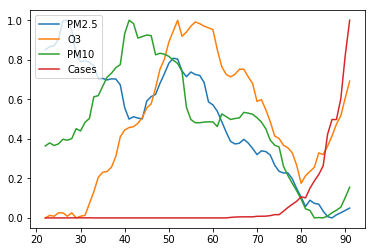

In [22]:
plt.close()
plt.plot(dates, p['PM2'], label="PM2.5")
plt.plot(dates, p['O3'], label="O3")
plt.plot(dates, p['PM10'], label="PM10")
plt.plot(dates, p['cases'], label='Cases')
plt.legend(loc='upper left')
plt.show()

In [ ]:
plt.close()
df[df['county']=='Ventura'].plot('date_number', 'PM10', kind='line')
df[df['county']=='Ventura'].plot('date_number', 'PM10_correlation_current_flow_betweenness', kind='line')
df[df['county']=='Ventura'].plot('date_number', 'cases', kind='line')
plt.show()